# CP 2025-26: Assignment 5 - Initial value problems

### General Guidelines

> ⚠️⚠️⚠️ READ CAREFULLY ⚠️⚠️⚠️

- Do not add, delete or create cells, write the answer only in the space marked with the three dots (`...`). Where function skeletons are provided, it is assumed that that function can be called again with different inputs somewhere else. So be careful to write code outside of functions.
  - Function should be ['pure'](https://en.wikipedia.org/wiki/Pure_function), thus no side effects, unless otherwise specified.
- Run the the first cell to import all libraries when opening the notebook before running your own code.
- Read carefully what is required to be printed/returned/plotted in the answer. Please do not output what is not asked for. 
  - If you used the print function for debugging, comment it out ( Ctlr + / ) before submitting
- All plots should have title, xlabel, ylabel, and legend (if there are more than one curve on the plot)
- Use the `help()` function, consult python documentation when using new functions, or do a web search and consult [stackoverflow](https://stackoverflow.com/questions/tagged/python)
- Please read the error messages if you get any, and try to understand what they mean. Debugging code is an essential skill to develop.
- You can use `%debug` to start an IPython console in a cell (or a scratchpad cell!) after an exception has occurred to try to debug.
- You can use `%pdb` to toggle the Python DeBugger (pdb) auto start after an unhandled exception.
- In the assignments you will find some tests put in place, to help you verify your solution. If these fail you are certain you did something wrong, thus look at the hints they provide. But passing these tests does __not__ mean your solution is actually correct.

Make sure you use `python3.12` and the package versions as stated in the provided `requirements.txt`. This file should also be on the course page.

In [123]:
# Importing relevant libraries in the assignment

# This will create static plots (no zooming etc.)
# otherwise try just plain `%matplotlib`, or install a backend such as ipympl or PyQt5 and
# do or `%matplotlib ipympl` `%matplotlib qt`
%matplotlib inline

REPEAT_IMPORTS = True

if REPEAT_IMPORTS or ("IMPORTED_ALL" not in globals()):  # To save you a bit of time

    def print_import_info(package):
        print(
            "Successfully imported %-15s \tVersion: %10s"
            % (package.__name__, package.__version__)
        )

    ### Standard library imports

    import sys

    print("Python version {}".format(sys.version))
    if sys.version_info < (3, 12):
        print(
            "\u001b[31m"  # red
            "\u001b[1m"  # bold
            "WARNING: Use Python 3.12 or newer to not encounter any errors or "
            "problems later on.\n"
            "\u001b[0m"  # reset
        )
    del sys  # Do not need it anymore

    import typing
    from typing import Callable, List, Tuple, Union

    ### Import third party libraries
    # Initialize self assessment helper
    import otter

    grader = otter.Notebook("Assignment_Q1_L5.ipynb")

    import numpy as np
    import numpy.typing as npt

    print_import_info(np)

    import numpy.typing as npt
    import scipy
    from scipy import integrate, optimize

    print_import_info(scipy)

    import matplotlib
    import matplotlib.pyplot as plt

    print_import_info(matplotlib)

    IMPORTED_ALL = True
    print("Finished importing packages")
else:
    print("Already imported all packages")

Python version 3.12.10 (v3.12.10:0cc81280367, Apr  8 2025, 08:46:59) [Clang 13.0.0 (clang-1300.0.29.30)]
Successfully imported numpy           	Version:      2.3.2
Successfully imported scipy           	Version:     1.16.1
Successfully imported matplotlib      	Version:     3.10.5
Finished importing packages


## Question 1: Cooling of a hot object

You are tasked with modeling the cooling of a hot object. According to **Newton’s Law of Cooling**, the rate of change of the temperature of an object is proportional to the difference between its temperature and the ambient temperature. The governing equation can be written as:

\begin{equation}
    \frac{dT}{dt} = -k(T(t) - T_{\infty})
    \tag{Eq. 1.1}
\end{equation}

Where:
- $T(t)$ is the temperature of the object at time $t$ (in °C),
- $T_{\infty}$ is the ambient temperature (in °C),
- $k$ is the cooling constant (in $s^{-1}$),
- $t$ is time (in s).

Your task is to solve this **initial value problem** with the following parameters:
- Initial temperature of the object, $T(0)$: 90°C,
- Ambient temperature, $T_{\infty}$: 20°C,
- Cooling constant, $k$: 0.01 $s^{-1}$,
- Time step: $\Delta t$ = 10 $s$,
- Total simulation time: 10 minutes.

### Question 1.1

Implement a numerical solution using the **forward Euler method** to approximate the temperature of the object over time.

- Write a Python function `cooling_fe` that:
  - Takes the initial temperature, cooling constant, ambient temperature, time step, and total simulation time as inputs.
  - Returns two numpy arrays in a tuple, containing the time and temperature at each integration step.
- Store the solution for the given IVP parameters in `times_fe` and `temperatures_fe`.
- Plot the temperature over time.Make sure to include: title and axis labels.

Text(0, 0.5, 'temperature')

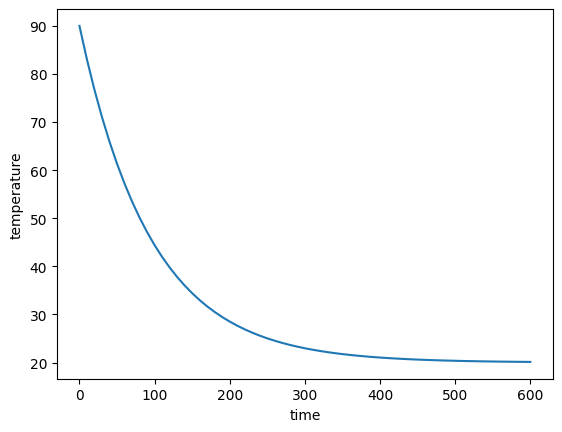

In [124]:
# Question 1.1: Cooling of an object using Forward Euler
def temp(t,T, temp_inf,k):
    return -k*(T -temp_inf)

def cooling_fe(
    T0: float, k: float, T_inf: float, delta_t: float, total_time: float
) -> tuple[np.ndarray, np.ndarray]:
    """
    Solves the cooling problem using the finite difference method (Euler forward).

    Parameters:
    - T0(float): Initial temperature (°C)
    - k(float): Cooling constant (s^-1)
    - T_inf(float): Ambient temperature (°C)
    - delta_t(float): Time step (s)
    - total_time(float): Total time of simulation (s)

    Returns:
    - times(np.ndarray): Array of time steps
    - temperatures(np.ndarray): Array of temperatures corresponding to each time step
    """
    N = int(total_time/delta_t)
    time = np.linspace(0,total_time,N+1)

    temperature = np.zeros(len(time))
    temperature[0] = T0
    for i in range(1,len(time)):
       temperature[i] = temperature[i-1] + delta_t*temp(time[i-1], temperature[i-1],temp_inf=T_inf,k= k ) #for the integration, use the left rectangle method

    return time, temperature


# Test the function with given parameters
T0 = 90
k = 0.01
T_inf = 20 
delta_t = 10
total_time = 10*60

times_fe, temperatures_fe = cooling_fe(T0,k,T_inf,delta_t,total_time)

# Plot the results
fig, ax= plt.subplots()
ax.plot(times_fe,temperatures_fe,label = "forward euler solution")
ax.set_xlabel('time')
ax.set_ylabel('temperature')

In [125]:
grader.check("q1_1")

q1_1 results: All test cases passed!

### Question 1.2

Implement a numerical solution using the **backward Euler method** to approximate the temperature of the object over time. 

- Write a Python function `cooling_be` that:
  - Takes the initial temperature, cooling constant, ambient temperature, time step, and total simulation time as inputs.
  - Returns two numpy arrays in a tuple, containing the time and temperature at each integration step.
- Store the solution for the given IVP parameters in `times_be` and `temperatures_be`.
- Plot the temperature over time. Make sure to include: title and axis labels.

💡 **Hint**: In this problem, the backward Euler method leads to a simple linear equation for $T_{n+1}$. Because it is linear in a single unknown, you can rearrange it algebraically and write down an explicit update formula. No root-finding is required.

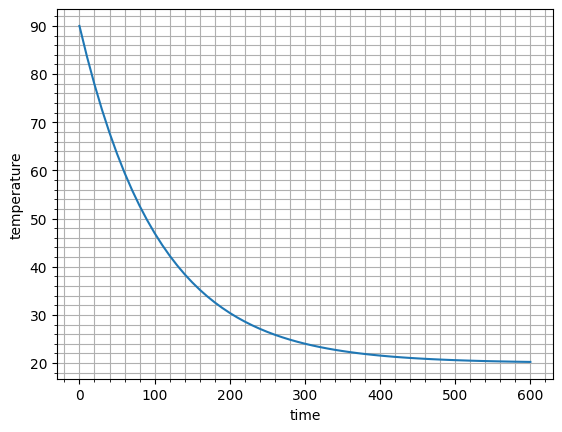

In [126]:
# Question 1.2: Cooling of an object using Backward Euler
def cooling_be(
    T0: float, k: float, T_inf: float, delta_t: float, total_time: float
) -> list[np.ndarray, np.ndarray]:
    """
    Solves the cooling problem using the finite difference method (Euler backward).

    Parameters:
    - T0(float): Initial temperature (°C)
    - k(float): Cooling constant (s^-1)
    - T_inf(float): Ambient temperature (°C)
    - delta_t(float): Time step (s)
    - total_time(float): Total time of simulation (s)

    Returns:
    - times(np.ndarray): Array of time steps
    - temperatures(np.ndarray): Array of temperatures corresponding to each time step
    """

    n = int((total_time/delta_t))
    time = np.linspace(0,total_time, n+1)

    temperature = np.zeros(len(time))
    temperature[0] = T0

    for i in range(1,len(time)):
        temperature[i] = (temperature[i-1] + delta_t*k*T_inf)/(1+delta_t*k)
    
    return time, temperature




# Test the function with given parameters
T0 = 90
k = 0.01
T_inf = 20
delta_t = 10
total_time = 10*60

times_be, temperatures_be = cooling_be(T0,k,T_inf,delta_t,total_time)

# Plot the results
plt.plot(times_be, temperatures_be)
plt.xlabel('time')
plt.ylabel('temperature')
plt.minorticks_on()
plt.grid(which='both')


In [127]:
grader.check("q1_2")

q1_2 results: All test cases passed!

### Question 1.3

Determine the analytical solution of $\text{Eq.}\ 1.1$ by hand.

- Write a Python function `analytical_solution` that defines the analytical solution you have derived. The function should:
  - Takes the initial temperature, cooling constant, ambient temperature, time step, and total simulation time as inputs.
  - Returns two numpy arrays in a tuple, containing the time and temperature at each integration step.
- Store the solution for the given IVP parameters in `times_analytical` and `temperatures_analytical`.
- Plot all solutions (forward Euler, backward Euler, analytical) in one diagram. Make sure to include: title, axis labels and legend. 

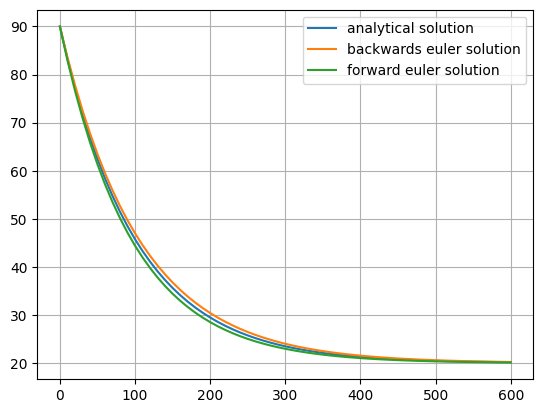

In [128]:
def analytical_solution(
    T0: float, k: float, T_inf: float, delta_t: float, total_time: float
) -> list[np.ndarray, np.ndarray]:
    """
    Solves the cooling problem using the analytical solution.

    Parameters:
    - T0(float): Initial temperature (°C)
    - k(float): Cooling constant (s^-1)
    - T_inf(float): Ambient temperature (°C)
    - delta_t(float): Time step (s)
    - total_time(float): Total time of simulation (s)

    Returns:
    - times(np.ndarray): Array of time steps
    - temperatures(np.ndarray): Array of temperatures corresponding to each time step
    """

    n = int(total_time/delta_t)
    time = np.linspace(0,total_time,n+1)
    temperature = np.zeros_like(time)
    temperature[0] = T0
    for i in range(1,len(time)):
        temperature[i] = T_inf + (T0 - T_inf)*np.exp(-k*time[i])

    return time, temperature



# Test the function with given parameters
T0 = 90
k = 0.01
T_inf = 20
delta_t = 10
total_time = 600

times_analytical, temperatures_analytical = analytical_solution(T0,k,T_inf,delta_t,total_time)

# Plot the results
fix,axes = plt.subplots()
axes.plot(times_analytical,temperatures_analytical,label= "analytical solution")
axes.plot(times_be, temperatures_be, label= "backwards euler solution")
axes.plot(times_fe, temperatures_fe, label = "forward euler solution")
axes.legend()
axes.grid(which="both")

In [129]:
grader.check("q1_3")

q1_3 results: All test cases passed!

### Question 1.4

Solve the IVP from $\text{Eq.}\ 1.1$ using the build-in function [`scipy.integrate.solve_ivp()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html):
- Use SciPy’s explicit Runge–Kutta 3(2) method:
  - Save the time points from the result in a variable named `times_ivp`.
  - Save the entire solver output object in `solve_ivp_sol`, and print it once to understand what attributes it contains.
  - Extract the temperature solution array from the solver output and store that in `temperatures_ivp`.
  
- Use the analytical solution defined in Question 1.3 in `temperatures_analytical`, to compute the element-wise absolute errors for:
  - `temperatures_fe` computed using forward Euler in (Question 1.1),
  - `temperatures_be` computed using backward Euler in (Question 1.2),
  - your `solve_ivp()` solution.
  - Store these in `errors_fe`, `errors_be`, and `errors_ivp` respectively.
  
- Create a single figure with two subplots:
  - Subplot 1: Plot all solutions (forward Euler, backward Euler, solve_ivp, analytical) vs. time.
  - Subplot 2: Plot the three absolute error curves vs. time.
  - Make sure to include: titles, axis labels and legends.
  - Store `(fig, axes)` in `cooling_plot` for grading.

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  1.000e+01 ...  5.900e+02  6.000e+02]
        y: [[ 9.000e+01  8.334e+01 ...  2.007e+01  2.006e+01]]
      sol: None
 t_events: None
 y_events: None
     nfev: 38
     njev: 0
      nlu: 0
[  0.  10.  20.  30.  40.  50.  60.  70.  80.  90. 100. 110. 120. 130.
 140. 150. 160. 170. 180. 190. 200. 210. 220. 230. 240. 250. 260. 270.
 280. 290. 300. 310. 320. 330. 340. 350. 360. 370. 380. 390. 400. 410.
 420. 430. 440. 450. 460. 470. 480. 490. 500. 510. 520. 530. 540. 550.
 560. 570. 580. 590. 600.]
[90.         83.33824798 77.30369793 71.83092955 66.88017946 62.4121622
 58.36489613 54.69350786 51.37311334 48.37882853 45.67199862 43.213751
 40.98833129 38.98014605 37.17092862 35.52775863 34.03701095 32.68927376
 31.47513522 30.38061455 29.38458864 28.48074625 27.66375474 26.92828146
 26.26725595 25.66519446 25.11730342 24.62087829 24.17321452 23.77160758
 23.41

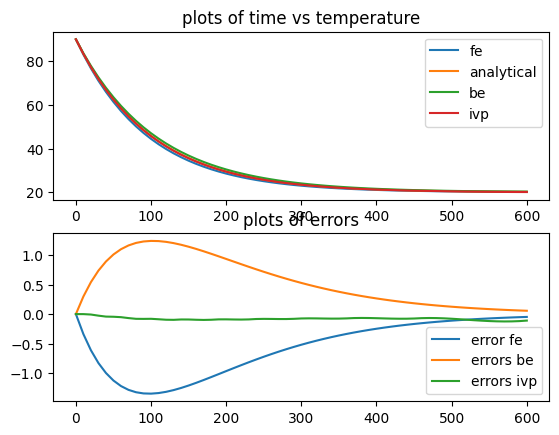

In [130]:

def dT(t: float, T:float, k:float)->float: 
    return -k*(T-T_inf)

total_time = 600
time_span = [0,total_time]
delta_t = 10
n = int(total_time/delta_t)
t_eval = np.linspace(0, time_span[1], n+1)


T0 = [90]
# times_ivp = ...
solve_ivp_sol = scipy.integrate.solve_ivp(dT,time_span,T0,method='RK23', t_eval= t_eval, args=[k])

# Print solve_ivp_sol
print(solve_ivp_sol)

# Obtain temperatures array from solve_ivp_sol
times_ivp = solve_ivp_sol.t
temperatures_ivp = solve_ivp_sol.y[0]


print(times_ivp)
print(temperatures_ivp)

# Compute absolute errors between numerical and analytical solutions
errors_fe = temperatures_fe - temperatures_analytical
errors_be = temperatures_be - temperatures_analytical
errors_ivp = temperatures_ivp - temperatures_analytical

# Plot the results in 2 subplots
fig, axes = plt.subplots(2)
axes[0].plot(times_fe, temperatures_fe, label = "fe")
axes[0].plot(times_analytical, temperatures_analytical, label = 'analytical')
axes[0].plot(times_be, temperatures_be, label = 'be')
axes[0].plot(times_ivp, temperatures_ivp, label = 'ivp')
axes[0].set_title('plots of time vs temperature')
axes[0].legend()

#erros 
axes[1].plot(times_fe, errors_fe, label = 'error fe')
axes[1].plot(times_be, errors_be, label = 'errors be')
axes[1].plot(times_ivp, errors_ivp, label = 'errors ivp')
axes[1].set_title('plots of errors')
axes[1].legend()
# fig.legend()
# Save the figure object and axes for grading purposes
cooling_plot = fig, axes 

In [131]:
grader.check("q1_4")

q1_4 results: All test cases passed!

### Reflect on the results

Evaluate the absolute error subplot from Question 1.4 in terms of:

1. Trend and magnitude: Describe and compare the overall shapes and magnitudes of the error curves for the three methods (Forward Euler, Backward Euler, `solve_ivp()`).

2. Method order: Relate the observed error magnitudes and shapes to the order of accuracy of each method.

3. Effect of $\Delta t$: Discuss how the chosen step size ($\Delta t$ = 10 s) influences the results, and predict what would happen to the error curves if Δt were halved.


Write your discussion in 4–6 sentences in the text box below.


_Type your answer here, replacing this text._

## Bonus Question 2: Simple harmonic oscillator

The simple harmonic oscillator consists of a body moving in a straight line under the influence of a force $F$ whose magnitude is proportional to the displacement $x$ of the body from the point of equilibrium, and whose direction is towards this point.

\begin{equation}
F=−k(x−x_0)
\tag{Eq. 2.1}
\end{equation}

The force acts in the direction opposite to that of the displacement. The constant $k$
is a measure of how hard or soft the spring is.

Newton’s law of motion states that the force applied on an object equals its mass multiplied by its acceleration. The variable $h=x−x_0$
represents the displacement of the spring from its undistorted length, and the acceleration is the second derivative of the displacement. Therefore:

\begin{equation}
F=m\frac{d^2h(t)}{dt^2}
\tag{Eq. 2.2}
\end{equation}

Combining equations Eq. $2.1$ and Eq. $2.2$ we obtain:

\begin{equation}
m\frac{d^2h(t)}{dt^2}=−kh(t)
\tag{Eq. 2.3}
\end{equation}

which is a second order differential equation. Notice that $m$
(the mass of the body) and $k$ (the spring constant) are not functions of $x$.

If the oscillator moves in a viscous medium, we need to include a frictional term in Newton’s equation. The force due to friction is proportional to the velocity of the mass ($\frac{dh(t)}{dt}$), and the direction is opposite to the displacement. Therefore:

\begin{equation}
m\frac{d^2h(t)}{dt^2}=−kh(t)−γ\frac{dh(t)}{dt}
\tag{Eq. 2.4}
\end{equation}

where $γ$ is a constant that depends on the viscosity of the medium. Assume that the displacement $h(t)$
and the velocity $\frac{dh(t)}{dt}$ at time $t=0$ are: $h(0)=A$ and $\frac{dh(0)}{dt}=0$. Physically, this means that the displacement at $t=0$ is A, and the body is at rest.

**Objective**: Implement the Heun’s method to solve the IVP for the simple oscillator with the following parameters:
- $k=5  \ N/m$
- $m=3.5 \ kg$
- $γ = \sqrt{2mk} \ kg /s $
- $A=10 \ m$

Compare the results obtained using Heun's method to those obtained using forward Euler and backward Euler.

Follow the sub-questions below to complete this objective.

#### Question 2.1

- Use pen and paper to formulate the damped harmonic oscillator ( $\text{Eq}. \ 2.4$ ) as a first‑order ODE system suitable for numerical integration:
  - Define the state vector $y = [v, h]$, where $v = dh/dt$ is the velocity and $h$ is the displacement.
  - Derive the two first‑order ODEs for $dv/dt$ and $dh/dt$ respectively. 
- Implement the first-order ODE system in a function `ode(t, h)` returning an array containing [$dv/dt$, $dh/dt$] in this order.

In [132]:
# Question 2.1: Simple Harmonic Oscillator 
def ode(t: float, h: np.ndarray) -> np.ndarray:
    """
    Defines the second-order ODE for the simple harmonic oscillator 
    as a system of first-order ODEs.

    Parameters
    ----------
    t : float
        Current time
    h : np.ndarray
        Variables of the ODE system

    Returns
    -------
    np.ndarray
        Rate of change of variables at time t
    """
    k = 5
    m= 3.5
    gamma = np.sqrt(2*m*k) 
    A = 10


    y0, y1 = h          # the first value is dirchelet, the second value is the first derivative (the values are stored in the derivatives order)
    dh = np.zeros(2)
    dh[0] = y1
    dh[1] = -(1/m) * k * y0 - (1/m) * gamma * 1

    return dh

In [133]:
grader.check("q2_1_1")

q2_1_1 results: All test cases passed!

#### Question 2.2
   - Use pen and paper to derive the Heun's method. The Heun's method uses the trapezoidal approach for integration (see lecture 4). To derive the Heun's method, follow the same steps as for forward and backward Euler in lecture 5. You will notice that the resulting equation for $y_{i+1}$ is *implicit*. Use the forward Euler method to make an initial prediction for $y_{i+1}$ and use that value on the right hand side of your equation for the Heun’s method prediction.
 
   - Create a function `heun` that implements Heun's method.


In [134]:
# Question 2.2 : Heun's method
def heun(func: Callable, y0: np.ndarray, t: np.ndarray) -> np.ndarray:
    
    """Generic Heun's method for IVPs.

    Args:
        func (Callable) : ODE system to be solved
        y0 (np.ndarray) : Initial condition, 2D
        t (np.ndarray) : Time grid points

    Returns:
        np.ndarray
            Solution of ODE system, 2D
    """
    

    y = np.zeros((len(y0),len(t)))
    h = t[1] - t[0]
    y[:,0] = y0

    for i in range(0,len(t)-1):
        # the y value at the current step
        f_i = func(t[i], y[:,i])
        # predict the value of y with forward euler
        y_pred = y[:,i] + h*f_i
        # define your predicted function 
        f_pred = func(t[i+1], y_pred)
        # solve for the integration at the next point, using the trapezoid rule 
        y[:,i+1] = y[:,i] + 0.5*h*(f_i + f_pred)



    return y

In [135]:
grader.check("q2_1_2")

q2_1_2 results: All test cases passed!

#### Question 2.3

Create a function `forward_euler` that implements the forward Euler method.


In [143]:
def forward_euler(func: Callable, y0: np.ndarray, t: np.ndarray) -> np.ndarray:
    """
    Generic forward Euler method for IVPs.

    Arge: 
    func (Callable) : ODE system to be solved
    y0 (np.ndarray) : Initial condition, 2D
    t (np.ndarray)  : Time grid points

    Returns:
        np.ndarray
            Solution of ODE system, 2D
    """

    y = np.zeros((len(y0), len(t)))
    y[:, 0] = y0
    h = t[1] -t[0]

    for i in range(len(t)-1):
        y[:, i+1] = y[:, i] + h*func(t[i], y[:,i])

    return y

In [144]:
grader.check("q2_1_3")

q2_1_3 results: All test cases passed!

#### Question 2.4

Create a function `backward_euler` that implements the backward Euler method.

💡 **Hint**: Recall that the backward Euler method is **implicit**: at each step you must solve an equation for the unknown next value $y_{n+1}$. Implement this by formulating the residual equation and using a root-finding method (e.g. [`scipy.optimize.fsolve`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fsolve.html)) to obtain $y_{n+1}$ at every time step.


In [138]:
def backward_euler(func: Callable, y0: np.ndarray, t: np.ndarray) -> np.ndarray:

    """
    Generic backward Euler method for IVPs. Use scipy's
    fsolve to solve root finding problem.

    Parameters
    ----------
    func : Callable
        Function that defines the ODE (y' = func(t, y)).
    y0 : np.ndarray
        Initial condition.
    t : np.ndarray
        Time domain.

    Returns
    -------
    np.ndarray
        Array of solution values at the time points.
    """
    h = t[1] - t[0] 
    y = np.zeros((len(y0),len(t)))
    y[:,0] = y0

    for i in range(0,len(t)-1):
        # basic formula for backwards euler: 
        # y[:,i+1] = y[:,i] + h* func(t[i+1], y[:,i+1])
        # so you need to rearange so that you have your unknonw on one side
        # 0 = y[:,i] + h*func(t[i+1], y[:,i+1]) - y[:,i+1]
        y_guess = y[:,i]
        euler = lambda y_next: y[:,i] + h*func(t[i+1], y_next) - y_next
        y[:, i+1] = scipy.optimize.fsolve(euler, y_guess)
        


    return y

In [139]:
grader.check("q2_1_4")

q2_1_4 results: All test cases passed!

#### Question 2.5

   - Use the three methods (forward Euler, backward Euler, and Heun's) to solve the IVP on the provided time grid `t`.
   - Store the full results in `sol_forward`, `sol_backward` and `sol_heun` respectively.
   - Extract displacement $h$ and velocity $v$ from each array (extract them in the correct order, remember how you were asked to define the ODEs in question 2.1).
   - Create one figure with two subplots:
     - Top subplot: plot displacement $h$ for all three methods.
     - Bottom subplot: plot velocity $v$ for all three methods.
     - Include clear axis labels, a title and legends for the subplots.

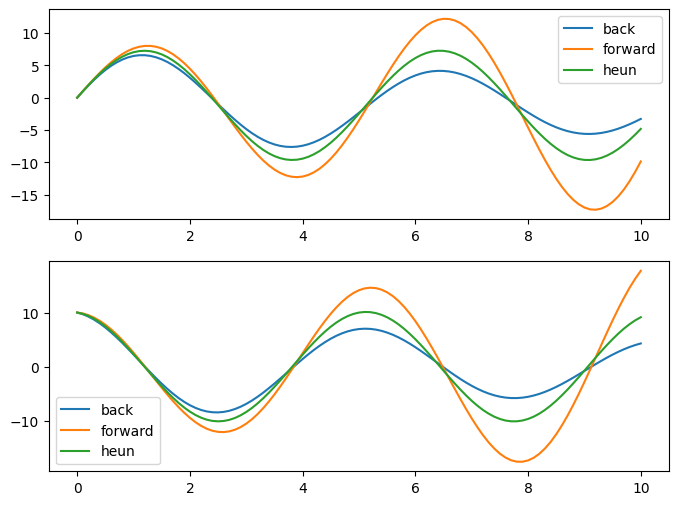

In [145]:
# Parameters
t = np.linspace(0, 10, 101) # Time grid
h0 = [0,10]

# Solve using all methods
sol_forward = forward_euler(ode,h0,t)
sol_backward = backward_euler(ode,h0,t)
sol_heun = heun(ode,h0,t)

# Extract displacement and velocity
velocity_for, displacement_for = sol_forward
velocity_back, displacement_back = sol_backward
velocity_heun, displacement_heun = sol_heun


# Create subplots
fig, axe = plt.subplots(2,1,figsize=(8,6))

axe[0].plot(t, velocity_back, label = "back")
axe[0].plot(t, velocity_for, label = "forward")
axe[0].plot(t, velocity_heun, label = "heun")
axe[0].legend()

axe[1].plot(t, displacement_back, label = 'back')
axe[1].plot(t,displacement_for, label= 'forward')
axe[1].plot(t,displacement_heun, label = 'heun')
axe[1].legend()